# Machine Learing

“Machine Learning at its most basic is the practice of using algorithms to parse data, learn from it, and then make a determination or prediction about something in the world.” – Nvidia 

“Machine learning is the science of getting computers to act without being explicitly programmed.” – Stanford

## Supervised Machine Learning

Supervised learning is where we have input variables 'x' and an output variable 'y'.
We use an algorithm to learn the function mapping input to output.

y = f(x)

Classification: Output variable is a category, such as “cat” and “dog”, "buy", "sell" or "hold" in relation to stock market positions or in the case of the Titanic dataset "survived" or "did not survive". Examples include classifying images or predicting the next button press for an AI.
    
    
Regression: Output variable is a real value, such as “dollars” or “weight”. Examples are predicting house prices or the value of an asset on the stock market.

Vast majority of supervised machine learning tasks are classification.

## Unsupervised Machine Learning

Unsupervised learning is where we only have input data 'x' and no corresponding output variables. The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data. Called unsupervised learning because there is no correct answers. Algorithms discover and present the interesting structure in the data.

Clustering: Used to discover inherent groupings in the data, such as grouping customers by purchasing behavior. Used in social network analysis to cluster communities.

Association: Used to discover rules that describe large portions of the data, such as people that buy X also tend to buy Y. Used in cross-selling: "Customers who bought this item also bought", "Because you watched ..."   

### Import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [5]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
full_df = data_train.append(data_test , ignore_index = True)

### Transform categorical variables to numerical

In [14]:
sex = pd.Series( np.where( full_df.Sex == 'male' , 1 , 0 ) , name = 'Sex' )

In [17]:
embarked = pd.get_dummies( full_df.Embarked , prefix='Embarked' )

In [18]:
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [19]:
pclass = pd.get_dummies( full_df.Pclass , prefix='Pclass' )

### Fill nan values

In [20]:
imputed = pd.DataFrame()

imputed[ 'Age' ] = full_df.Age.fillna( full_df.Age.mean() )

imputed[ 'Fare' ] = full_df.Fare.fillna( full_df.Fare.mean() )

imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


### Feature engineering

In [22]:
family = pd.DataFrame()

family[ 'FamilySize' ] = full_df[ 'Parch' ] + full_df[ 'SibSp' ] + 1

family[ 'Family_Single' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Family_Small' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
family[ 'Family_Large' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [23]:
full_X = pd.concat( [ imputed , embarked , sex, pclass, family ] , axis=1 )
full_X.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex,Pclass_1,Pclass_2,Pclass_3,FamilySize,Family_Single,Family_Small,Family_Large
0,22.0,7.2500,0,0,1,1,0,0,1,2,0,1,0
1,38.0,71.2833,1,0,0,0,1,0,0,2,0,1,0
2,26.0,7.9250,0,0,1,0,0,0,1,1,1,0,0
3,35.0,53.1000,0,0,1,0,1,0,0,2,0,1,0
4,35.0,8.0500,0,0,1,1,0,0,1,1,1,0,0


## Create Datasets

In [36]:
from sklearn.model_selection import train_test_split
train_features = full_X[ 0:891 ]
target = data_train.Survived

to_predict = full_X[ 891: ]

train_X , test_X , train_y , test_y = train_test_split( train_features , target, test_size = .30 )

### DecisionTree

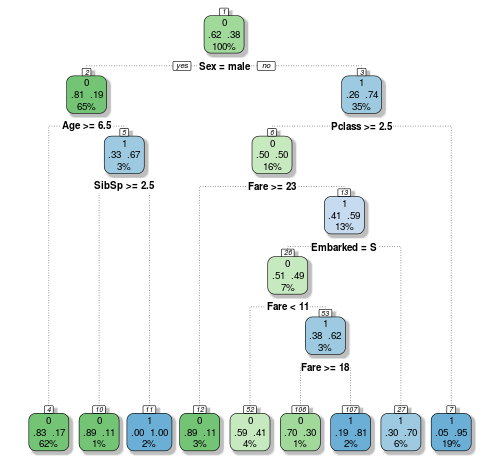

In [7]:
Image("example.png")

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
dtree.score(test_X, test_y)

0.8283582089552238

In [54]:
print (dtree.score( train_X , train_y ) , dtree.score( test_X , test_y ))

0.9807383627608347 0.8283582089552238


In [55]:
dtree.feature_importances_

array([2.75552718e-01, 2.11281028e-01, 6.44119421e-03, 3.88699836e-03,
       4.84139528e-03, 2.89373882e-01, 2.94270705e-02, 0.00000000e+00,
       8.45080947e-02, 4.34100946e-02, 8.09791326e-05, 5.11965450e-02,
       0.00000000e+00])

In [61]:
pred = dtree.predict( to_predict )
passenger_id = data_test.PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': pred } )
test.shape
test.head()
test.to_csv( 'DecisionTree_pred.csv' , index = False )

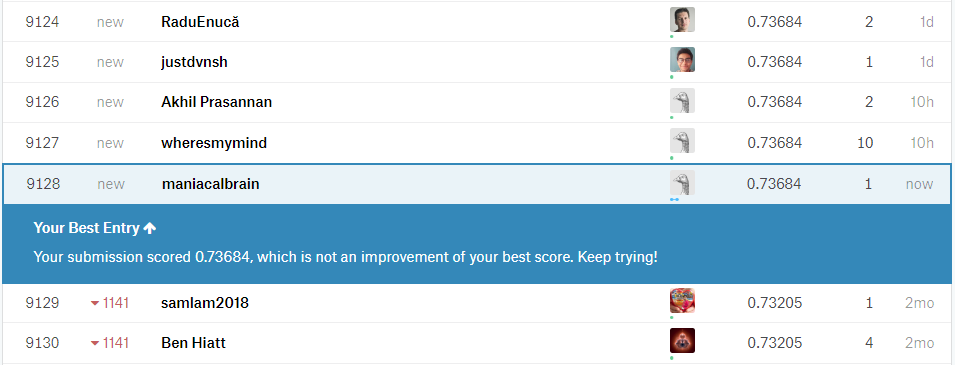

In [2]:
Image("decision_tree.PNG")

## Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(train_X, train_y)
print(rfc.score( train_X , train_y ) , rfc.score( test_X , test_y ))

0.9807383627608347 0.8432835820895522


In [64]:
rfc.fit(train_features, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
pred = rfc.predict( to_predict )
passenger_id = data_test.PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': pred } )
test.shape
test.head()
test.to_csv('RFC_pred.csv' , index = False )

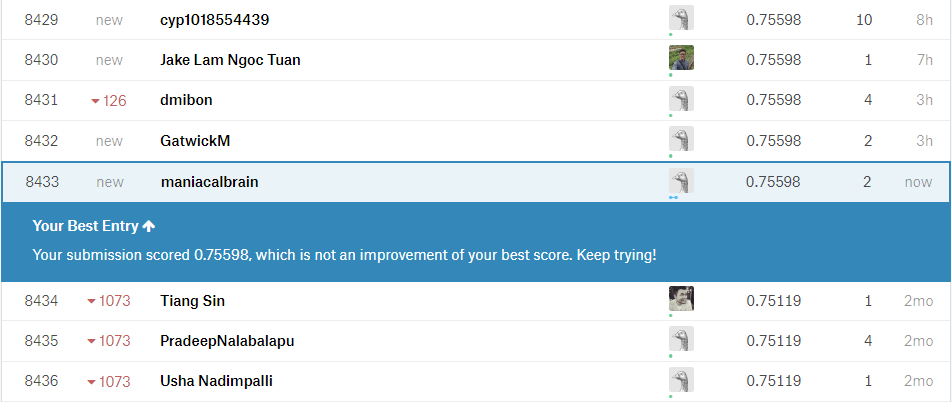

In [4]:
Image("RFC.PNG")

### XGBoost

In [71]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=1000, learning_rate = 0.15)
xgb.fit(train_features, target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.15, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [72]:
pred = xgb.predict( to_predict )
passenger_id = data_test.PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': pred } )
test.shape
test.head()
test.to_csv('xgb_pred.csv' , index = False )

### Support Vector Machine

In [73]:
from sklearn.svm import SVC
svc = SVC() 
svc.fit(train_features, target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [74]:
pred = svc.predict( to_predict )
passenger_id = data_test.PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': pred } )
test.shape
test.head()
test.to_csv('svc_pred.csv' , index = False )

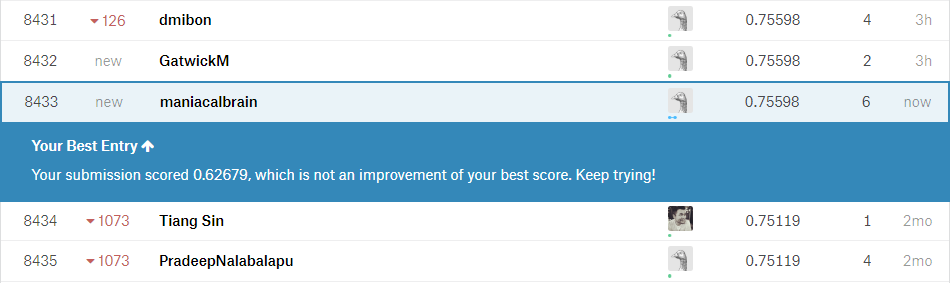

In [5]:
Image("svc.PNG")

# Conclusion

https://scikit-learn.org/stable/index.html
https://www.anaconda.com/

https://trevorstephens.com/kaggle-titanic-tutorial/getting-started-with-r/

https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial
https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish
https://www.kaggle.com/

https://numer.ai/rounds
https://www.drivendata.org/